In [10]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, ms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state = 42)

###### PLS için gerekli kütüphaneler:

In [2]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train) # n_components = 2 --> iki bileşenli model kuruldu
pls_model.coef_ # değişkenlerin katsıyalrı

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [3]:
# Tahmin
pls_model.predict(X_train)

array([[ 344.91941493],
       [ 848.87070769],
       [ 692.93622642],
       [ 185.56577984],
       [ 435.49196077],
       [ 987.49530026],
       [ 120.63097106],
       [ 289.9263406 ],
       [ 663.41886918],
       [ 817.90486641],
       [1400.82155793],
       [ 889.55177741],
       [ 966.02942625],
       [ 761.83859363],
       [ 817.87219643],
       [ 778.83233464],
       [ 947.29337036],
       [   2.76773968],
       [ -72.48003564],
       [ 382.99117487],
       [ 596.85479706],
       [ 977.61608943],
       [ 415.33783869],
       [ 464.78071379],
       [ -26.62516231],
       [ 722.22493096],
       [ 494.5057314 ],
       [ 242.23751188],
       [ 206.9261497 ],
       [ 232.56490602],
       [  64.4824203 ],
       [ 542.14513157],
       [ 947.14732555],
       [ 194.89583773],
       [ 362.6202354 ],
       [ 295.26950277],
       [ 439.33442044],
       [ 776.65786654],
       [ 317.39738256],
       [ 137.13823539],
       [ 103.25963596],
       [ 206.203

In [4]:
"TRAİN HATAMIZ"
y_pred = pls_model.predict(X_train)
print("egitim hatası")
print(np.sqrt(mean_squared_error(y_train, y_pred)))



egitim hatası
310.1167593109696


In [5]:
print("r2 degeri:")
r2_score(y_train, y_pred)

r2 degeri:


0.5140424486535482

In [6]:
"TEST HATAMIZ"
y_pred = pls_model.predict(X_test) # modeli kullanarak x test'i tahmin et diyoruz
# x test --> X_test içinde olan bağımsız değişkenlerin değlerini alacak bizim modelde hesapladığımız katsayıların yerine koyacak her gözlem için bir y tahmin değeri hesaplayacak
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# MODEL TUNİNG

Text(0.5, 1.0, 'Salary')

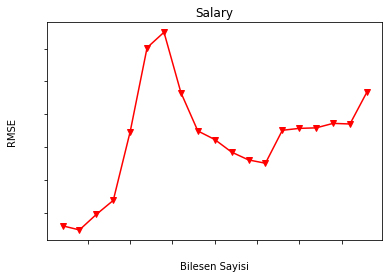

In [7]:
# CV
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10, 
                              shuffle = True, 
                              random_state = 1)
# Hata saptama döngüsü
RMSE = []
for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components = i)
    score = np.sqrt(-1 * cross_val_score(pls, X_train, y_train, cv = cv_10, scoring = 'neg_mean_squared_error').mean()) # Negative mean squared error 
    RMSE.append(score)
    
# Sonuçların modellenmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] +1), np.array(RMSE), '-v', c = 'r')
plt.xlabel('Bilesen Sayisi')
plt.ylabel('RMSE')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.title('Salary')

In [8]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
y_pred = pls_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

398.09956327448526


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.2678940112232917